In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Do wizualizacji 3D

In [14]:
# 1. Wczytanie i przygotowanie danych
penguins = sns.load_dataset('penguins').dropna()
X = penguins.select_dtypes(include='number')
y = penguins['species']

In [15]:
# 2. Standaryzacja i PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

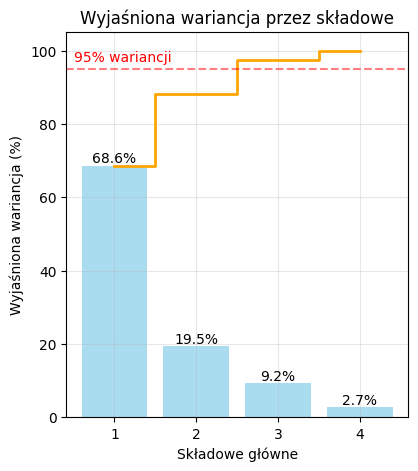

In [16]:
# 3. Rozszerzona wizualizacja
plt.figure(figsize=(15, 5))
# Wykres 1: Wyjaśniona wariancja
plt.subplot(1, 3, 1)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

bars = plt.bar(range(1, 5), explained_var*100, color='skyblue', alpha=0.7)
plt.step(range(1, 5), cumulative_var*100, where='mid', color='orange', linewidth=2)
plt.axhline(y=95, color='r', linestyle='--', alpha=0.5)
plt.text(0.5, 97, '95% wariancji', color='r')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Składowe główne')
plt.ylabel('Wyjaśniona wariancja (%)')
plt.title('Wyjaśniona wariancja przez składowe')
plt.grid(alpha=0.3)

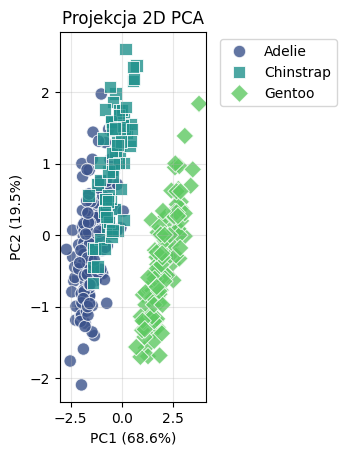

In [17]:
# Wykres 2: Projekcja 2D
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y, palette='viridis',
                style=y, markers=['o', 's', 'D'], s=80, alpha=0.8)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Projekcja 2D PCA')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)

<Axes: >

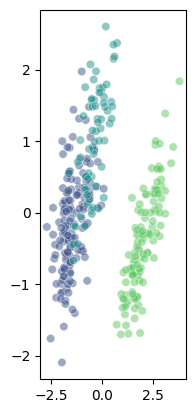

In [18]:
# Wykres 3: Biplot
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y, palette='viridis',
                alpha=0.5, legend=False)

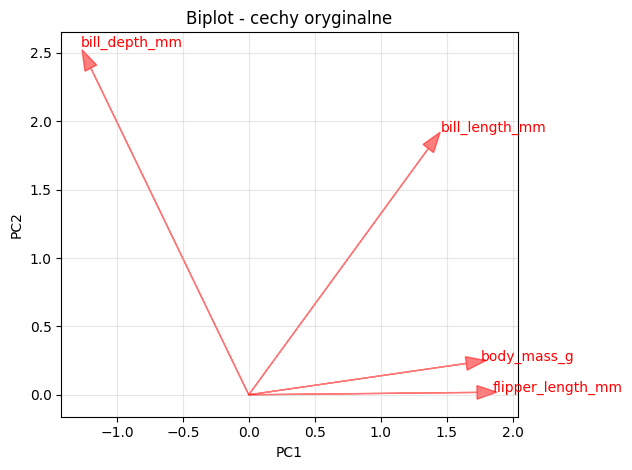

In [19]:
# Wektory cech
features = X.columns
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca_2d.components_[0,i]*3, pca_2d.components_[1,i]*3,
              color='r', alpha=0.5, head_width=0.1)
    plt.text(pca_2d.components_[0,i]*3.2, pca_2d.components_[1,i]*3.2,
             feature, color='r')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot - cechy oryginalne')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

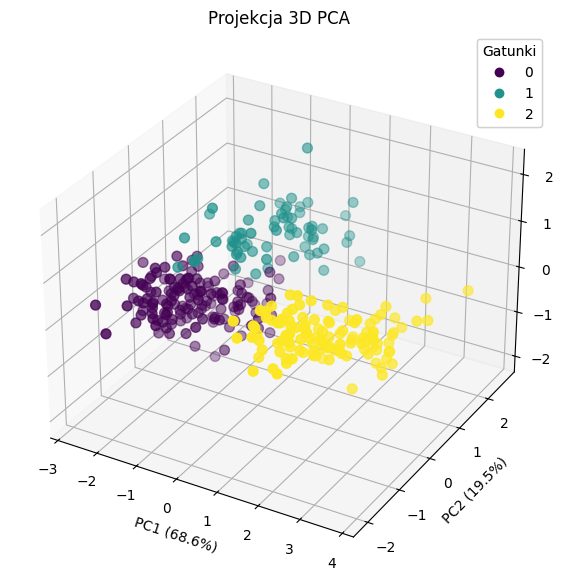

In [20]:
# 4. Analiza 3D (opcjonalna)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y.astype('category').cat.codes,
                     cmap='viridis', s=50)
plt.title('Projekcja 3D PCA')
ax.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({explained_var[2]*100:.1f}%)')
legend = ax.legend(*scatter.legend_elements(), title='Gatunki')
ax.add_artist(legend)
plt.show()


In [21]:
# 5. Wnioski i interpretacja
print("\nWNIOSKI:")
print(f"1. Dwie pierwsze składowe wyjaśniają {cumulative_var[1]*100:.1f}% wariancji danych")
print("2. Rozdzielenie gatunków na wykresie 2D PCA wskazuje na istotne różnice morfologiczne")
print("3. Biplot pokazuje, że:")
print(f"   - {features[2]} i {features[3]} silnie wpływają na PC1")
print(f"   - {features[0]} i {features[1]} mają większy wpływ na PC2")
print("4. Projekcja 3D sugeruje, że trzecia składowa może zawierać dodatkowe informacje")
print(f"   (łącznie 3 składowe wyjaśniają {cumulative_var[2]*100:.1f}% wariancji)")


WNIOSKI:
1. Dwie pierwsze składowe wyjaśniają 88.1% wariancji danych
2. Rozdzielenie gatunków na wykresie 2D PCA wskazuje na istotne różnice morfologiczne
3. Biplot pokazuje, że:
   - flipper_length_mm i body_mass_g silnie wpływają na PC1
   - bill_length_mm i bill_depth_mm mają większy wpływ na PC2
4. Projekcja 3D sugeruje, że trzecia składowa może zawierać dodatkowe informacje
   (łącznie 3 składowe wyjaśniają 97.3% wariancji)
